# Examen final Statistical Learning 2

### El dataset utilizado para este examen es respecto a cartera de tarjeta de crédito

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('BankChurners.csv')

In [3]:
from summarytools import dfSummary

In [4]:
# Descripción del dataset
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [5]:
# Resumen de las variables del dataset
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

In [6]:
# nombres de las columnas
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
# Importaremos la librería de seaborn para gráficos
import seaborn as sns

### El modelo que se creará es enfocado para marketing por ende se eligirán las variables que pueden servir a dicha área, las cuales son: Total de transacciones de tarjeta de crédito, edad promedio del cliente y el promedio de ratio de utilizacion

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

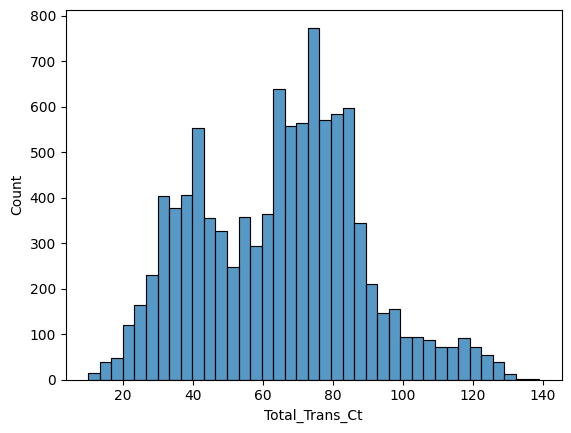

In [8]:
sns.histplot(data=data, x='Total_Trans_Ct')


<Axes: xlabel='Customer_Age', ylabel='Count'>

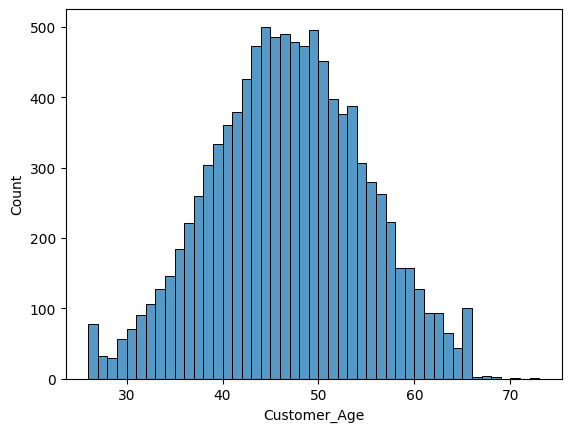

In [9]:
sns.histplot(data=data, x='Customer_Age')

<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

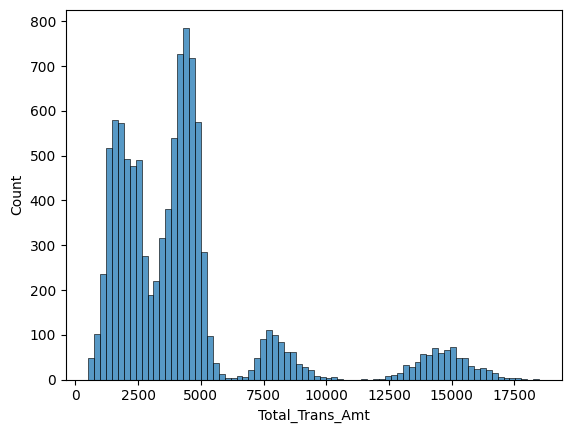

In [47]:
sns.histplot(data=data, x='Total_Trans_Amt')

In [11]:
from sklearn.preprocessing import power_transform

### Unificamos las variables que nos interesa analizar

In [48]:
data_clean = data[['Total_Trans_Ct', 'Customer_Age', 'Total_Trans_Amt']]
data_clean

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt
0,42,45,1144
1,33,49,1291
2,20,51,1887
3,20,40,1171
4,28,40,816
...,...,...,...
10122,117,50,15476
10123,69,41,8764
10124,60,44,10291
10125,62,30,8395


#### Realizamos una pequeña descripción de las variables

In [49]:
data_clean.describe()

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt
count,10127.000000,10127.000000,10127.000000
mean,64.858695,46.325960,4404.086304
std,23.472570,8.016814,3397.129254
min,10.000000,26.000000,510.000000
25%,45.000000,41.000000,2155.500000
50%,67.000000,46.000000,3899.000000
75%,81.000000,52.000000,4741.000000
max,139.000000,73.000000,18484.000000


<Axes: >

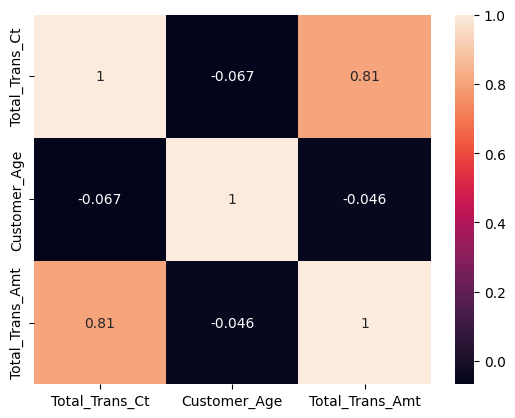

In [51]:
sns.heatmap( data_clean[['Total_Trans_Ct','Customer_Age','Total_Trans_Amt']].corr(),annot=True)

### El resultaodo de la gráfica anteiror nos indica que no hay mucha correlación de una variable a otroa, por ende, es bueno para nuestro modelo, exceptuando transacciones con montos de transaciciones que hay una cierta relación

##### Método IQR, iniciamos el proceso de eliminación de outliers

In [52]:
temp = pd.DataFrame()

for col in data_clean.columns:
    column = data_clean[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)

    #temp[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))

    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =45.0 Q3=81.0 IQR =36.0 umbral_inferior = -9.0 umbral_superior =135.0
Q1 =41.0 Q3=52.0 IQR =11.0 umbral_inferior = 24.5 umbral_superior =68.5
Q1 =2155.5 Q3=4741.0 IQR =2585.5 umbral_inferior = -1722.75 umbral_superior =8619.25


C:\Users\David\AppData\Local\Temp\ipykernel_15100\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\David\AppData\Local\Temp\ipykernel_15100\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\David\AppData\Local\Temp\ipykernel_15100\178902799.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [53]:
data_clean

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt,Total_Trans_Ct_outliers,Customer_Age_outliers,Total_Trans_Amt_outliers
0,42,45,1144,False,False,False
1,33,49,1291,False,False,False
2,20,51,1887,False,False,False
3,20,40,1171,False,False,False
4,28,40,816,False,False,False
...,...,...,...,...,...,...
10122,117,50,15476,False,False,True
10123,69,41,8764,False,False,True
10124,60,44,10291,False,False,True
10125,62,30,8395,False,False,False


In [54]:
data_clean.groupby(by='Total_Trans_Ct_outliers').count()

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt,Customer_Age_outliers,Total_Trans_Amt_outliers
Total_Trans_Ct_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [55]:
data_clean.groupby(by='Customer_Age_outliers').count()

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt,Total_Trans_Ct_outliers,Total_Trans_Amt_outliers
Customer_Age_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


In [56]:
data_clean.groupby(by='Total_Trans_Amt_outliers').count()

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt,Total_Trans_Ct_outliers,Customer_Age_outliers
Total_Trans_Amt_outliers,,,,,
False,9231,9231,9231,9231,9231
True,896,896,896,896,896


In [57]:
data_noout =  data_clean[data_clean['Total_Trans_Ct_outliers'] == False]
data_noout = data_noout[data_noout['Customer_Age_outliers'] == False]
data_noout = data_noout[data_noout['Total_Trans_Amt_outliers'] == False]
data_noout.reset_index(drop=True)

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt,Total_Trans_Ct_outliers,Customer_Age_outliers,Total_Trans_Amt_outliers
0,42,45,1144,False,False,False
1,33,49,1291,False,False,False
2,20,51,1887,False,False,False
3,20,40,1171,False,False,False
4,28,40,816,False,False,False
...,...,...,...,...,...,...
9224,87,49,7590,False,False,False
9225,64,52,7636,False,False,False
9226,77,51,8531,False,False,False
9227,53,55,6009,False,False,False


In [58]:
data_noout.describe()

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt
count,9229.000000,9229.000000,9229.000000
mean,60.910608,46.447394,3495.405353
std,20.080590,7.991650,1674.543926
min,10.000000,26.000000,510.000000
25%,43.000000,41.000000,2050.000000
50%,65.000000,46.000000,3655.000000
75%,77.000000,52.000000,4520.000000
max,113.000000,68.000000,8618.000000


#### Solo en las primeras dos variables se pudo realizar una limpieza de los outliers ya que la tercera variable (Avg_Utilization_Radio), no se le identificó outlier alguno

<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

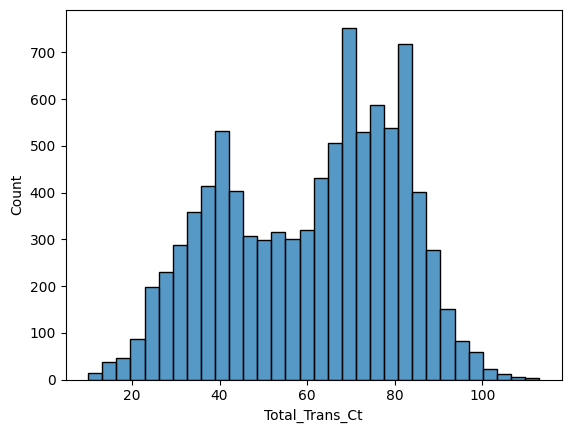

In [59]:
sns.histplot(data=data_noout, x='Total_Trans_Ct')

<Axes: xlabel='Customer_Age', ylabel='Count'>

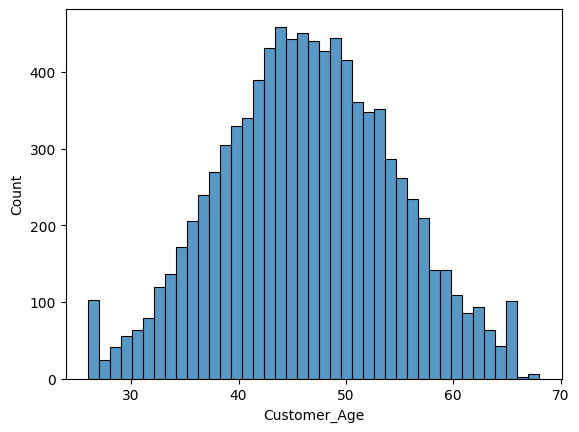

In [60]:
sns.histplot(data=data_noout, x='Customer_Age')

<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

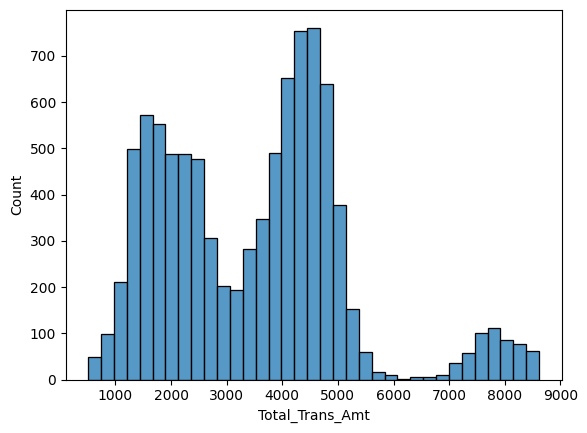

In [62]:
sns.histplot(data=data_noout, x='Total_Trans_Amt')

In [63]:
from sklearn.preprocessing import power_transform

In [64]:
dfSummary(data_noout)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Total_Trans_Ct[int64],Mean (sd) : 60.9 (20.1)min < med < max:10.0 < 65.0 < 113.0IQR (CV) : 34.0 (3.0),102 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACu0lEQVR4nO3dP47aQBSA8TdhQQMotvgj6LjASimQaDhAyhw2R0ixRWpuQIOQEDLCWQtjnCLSikibXfB4svOs79cbpvgEDGMepixLAUL36aMXANzi4aMXgL8ZY7oi0nF4iFNZls91rScUhBoQY0x3NBp9i6JoUPUxDofD3hjzvWmxEmpYOlEUDZbL5XMcx9m9FydJYp+enga73a4jIoQKv+I4ziaTya+Kl3drXUwg2ExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQJf+HvgcF4fXS6Xdt3raQJCrZnLeX2e57Yoiscsy36ISNWTqUYi1PpVPq9fr9eD1WrVO5/PLV+L04pQPalyXr/f7xt5Tl8HNlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoUJjj1CZONIsQYfqEJsdDodf4zjuV33upk4c0SrYUF1vlxORx8Vi8XM8Hh/uvb7JE0e0CjZUqeF2OWttzsSRZgg5VBHhdjn8EXyouE9RFG0RiYwxVS4PdgNJqA2Spmk7z/Mvs9ms1Wq17p4GGPIGklAb5HQ6PVhre/P5PJtOp/t7rg19A0moDdTv96uOrQz2sz0nU1CBUKECb/3/4LB7ZoiEB4T6CpfdM0Mk/CDUV7jsnhki4QehvqHK7plTMT/YTEEFQoUKhAoVCBUqECpUIFSoQKhQwev3qI6/BOUoEi+8her63/McReKaz1dUp/+e5ygS17wfoVb973mOInGNzRRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKvCbKbxwHLAm4nHIGqFCRNwHrIn4HbJGqBARt5+Ii/gfsvZuqA636nGbnkIOA9ZEPA5ZezNU1zn63KaHurz3iuo8R5/b9FCHmz6jMkcft/A5lv2mUJMksfc+6/F4tCIiaZra7Xbb+5/Xa31uresWEdlsNp99jmX/DbxHh/kbrKlxAAAAAElFTkSuQmCC"">",0(0.0%)
2,Customer_Age[int64],Mean (sd) : 46.4 (8.0)min < med < max:26.0 < 46.0 < 68.0IQR (CV) : 11.0 (5.8),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkklEQVR4nO3cQYriQBSA4VeTVqJCggi68wIDs3DpIeawc4RZeAJv4E4QiZjpYIyZxTBgg9Nqkpp+r/r/9unO4ieYVNVzdV0LoN2Xj74B4BEvH30DIXLODUSk3/DyU13Xr13eTwgItWPOucFkMvmeJMm4yfWHw2HvnPtBrG8Ravf6SZKMl8vla5qmxTMXZlkWr1ar8W6364sIoV4hVE/SNC2m0+mvBpcOOr+ZAPAyBRMIFSYQKkwgVJhAqDCBUGECn6f+ocXqUnK5XHpd389nR6g3tFldKssyrqrqa1EUP0WkyXdU3ECotzVeXdpsNuP1ej08n8+Rr5v7jAj1HU1Wl/b7PStLHvAyBRMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTgl2ZanlkmY0lygQZatsjy2ws0SfIUKXFphIRNpZoFGqoItL8yDIbS/QJOlSLqqrqiUjinGv6J4IcCUSoiuR53ivL8tt8Po+iKHr6J4tIuCOBCFWR0+n0EsfxcLFYFLPZbP/s9SGPBCJUhUajUdNxQCKBjgTigz9MIFSYQKgwgVBhAqHCBEKFCYQKEwgVJqj+4M+gMvylNlQGleGa2lCFQWW4ojlUEWFQGf7gZQomqH+i4jktN16r3XRNqAFpu/Fa86ZrQg1Im43X2jddE2qAWmy8VvsSyssUTCBUmECoMIFQYQKhwgRChQleP08x+hFd8RYqox/RJZ9PVEY/GqN5QJv3lSlGP9qgfUAbS6gQEf0D2ggVb2gd0HY3VA7YQYN3Q+WAHbS490TlgB0e5vN0wUO/UTlgh3t8ny7gZQqd8H26gFDRKV+nC9iUAhMeeqJmWRY/+4ePx2MsIpLnebzdbof/83qr/9vqfbe9/pG+fgOW5rLzr7Zi0AAAAABJRU5ErkJggg=="">",0(0.0%)
3,Total_Trans_Amt[int64],Mean (sd) : 3495.4 (1674.5)min < med < max:510.0 < 3655.0 < 8618.0IQR (CV) : 2470.0 (2.1),"4,214 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC50lEQVR4nO3dP0/bQBjH8d81gI4E2QQi2LIyIHVAYmHp1rEvtmu3DgxsSLyDbAjIHyUljQnpUFJASiH2ncFP+H72I0b6yrLzXGw3m80EVN2n9z4AYBlr730AVeWc25S0UXD5ZDab3cY8no+OUBdwzm3u7u5+S5KkWWT9YDDoOue+E2s8hLrYRpIkzZOTk9s0Tcd5Fvb7fX96etq8vr7ekESokRDqC9I0He/t7f0qsHQz+sF8cNxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGFCqV/4B87LJWbmeFBaqKHzcomZOR6VeUYtPC+XmJnjudJn/QHzcomZOR5wMwUTCBUmECpMIFSYQKgwgVBhAqHCBH4zVYLpdLouKXHOFVnO2HgBQo1sNBqtZ1n2ud1u12q1Wu6JHGPjxQg1sslksua9rx8dHY339/e7edYyNv4/Qi1Jo9Hgp9YRVTpUrvUwV9lQudbDU5UNlWs9PFXZUOe41oPEF/4wglBhAqHCBEKFCYQKEwgVJhAqTCBUmECoMKHyk6miAje0JPf39+uRDwkBVjLU0A0tWZb56XR6OB6Pf0oq+pQXRLSSoYZsaJGkTqfTvLi4qN/d3dXKOD7kt5KhzhXd0NLtdtnQUjHcTMEEQoUJhAoTCBUmECpMIFSY8OrXUwFvNmG6g2heDDXkzSZMdxDTa2fUwm82YbqDmJaaTBV5swnTHcTEzRRMIFSYQKgwgVBhAqHChJXej4q3Ffja+xefZ0uo+CcwNL+zs/M1TdNGkcWvPc+WUCEpbAop/Z1ESjo8Pj4+a7Vagzxrl3meLaFirvAUUnqcRHrvszKeZ0uoeKbIFFIqfxLJXT9M4IxaMYEPzpBW9G0whFohoQ/OkKRerzd0zv2QlHd9pfcPLxVqv9/3ef/wcDj0kjQajfzl5WX9Lddb/eybm5st73394ODAbW9v/86zVpJ6vd7W+fn5l3a73cob+nz/8NXV1Vnez5XC/u9l+voDHqNtljwFiawAAAAASUVORK5CYII="">",0(0.0%)
4,Total_Trans_

### Obtenemos ya la data limpia y unificada

In [65]:
data_noout = data_noout[['Total_Trans_Ct', 'Customer_Age', 'Total_Trans_Amt']]
data_noout

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt
0,42,45,1144
1,33,49,1291
2,20,51,1887
3,20,40,1171
4,28,40,816
...,...,...,...
10067,87,49,7590
10089,64,52,7636
10103,77,51,8531
10119,53,55,6009


#### Teniendo la data limpia y unifacada, se calcula los clusters con el método bos-cox

In [66]:
data_bc = power_transform(X=data_noout, method='box-cox')
data_bc = pd.DataFrame(data_bc, columns=data_noout.columns)
data_bc

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt
0,-0.957077,-0.182096,-1.721414
1,-1.374327,0.318606,-1.553486
2,-1.940891,0.569130,-0.975021
3,-1.940891,-0.807270,-1.689588
4,-1.597951,-0.807270,-2.153080
...,...,...,...
9224,1.330523,0.318606,1.991495
9225,0.125703,0.694433,2.007963
9226,0.798819,0.569130,2.316612
9227,-0.425573,1.070502,1.382117


<Axes: xlabel='Total_Trans_Ct', ylabel='Count'>

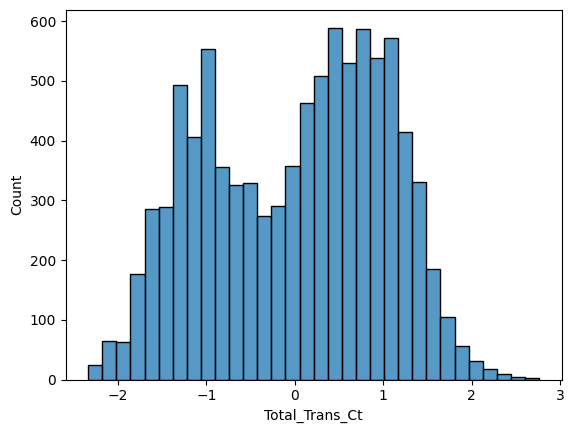

In [67]:
sns.histplot(data_bc,x= 'Total_Trans_Ct')

<Axes: xlabel='Customer_Age', ylabel='Count'>

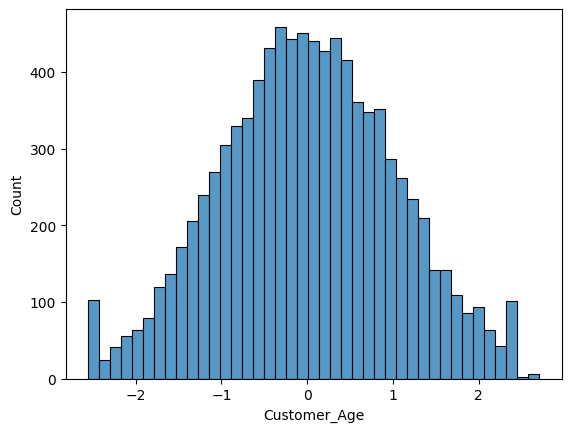

In [68]:
sns.histplot(data_bc,x= 'Customer_Age')

<Axes: xlabel='Total_Trans_Amt', ylabel='Count'>

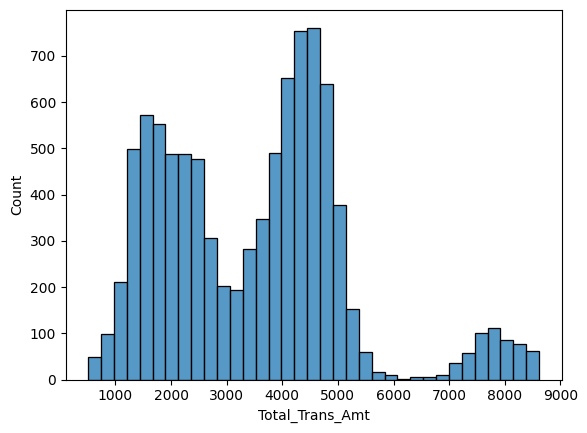

In [69]:
sns.histplot(data=data_noout, x='Total_Trans_Amt')

In [70]:
from sklearn.cluster import KMeans

In [71]:
inercia = []
ks = []

for k in range(1,25):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(data_bc)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

#### Ya aplicado el método box-cox pasamos a graficarlo

In [72]:
codo = {
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)


<Axes: xlabel='k', ylabel='inercia'>

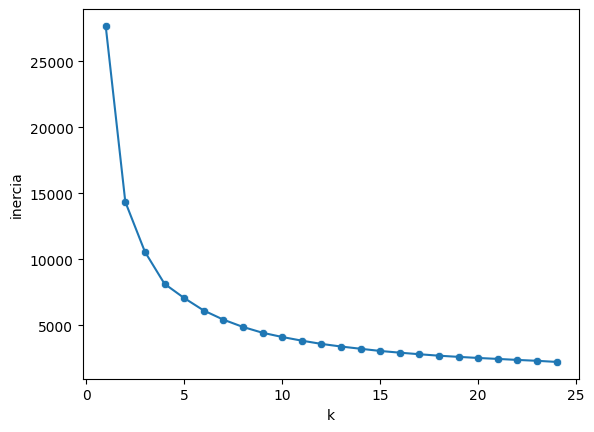

In [73]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

In [74]:
modelo = KMeans(n_clusters=5,random_state = 10)
modelo.fit(data_bc)

c:\Users\David\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=10)

In [75]:
data_noout['cluster'] = modelo.labels_
data_noout

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt,cluster
0,42,45,1144,1
1,33,49,1291,1
2,20,51,1887,1
3,20,40,1171,2
4,28,40,816,2
...,...,...,...,...
10067,87,49,7590,4
10089,64,52,7636,4
10103,77,51,8531,4
10119,53,55,6009,3


In [76]:
data_noout.groupby(by='cluster').count()

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt
cluster,,,
0,2663,2663,2663
1,1962,1962,1962
2,1835,1835,1835
3,2215,2215,2215
4,554,554,554


In [77]:
data_noout.describe()

,Total_Trans_Ct,Customer_Age,Total_Trans_Amt,cluster
count,9229.000000,9229.000000,9229.000000,9229.000000
mean,60.910608,46.447394,3495.405353,1.570376
std,20.080590,7.991650,1674.543926,1.289379
min,10.000000,26.000000,510.000000,0.000000
25%,43.000000,41.000000,2050.000000,0.000000
50%,65.000000,46.000000,3655.000000,1.000000
75%,77.000000,52.000000,4520.000000,3.000000
max,113.000000,68.000000,8618.000000,4.000000


In [78]:
data_noout.groupby(by='cluster').agg(['min','mean','max'])

Total_Trans_Ct                 Customer_Age                 \
                   min       mean  max          min       mean max   
cluster                                                              
0                   40  74.215922  103           26  41.481787  47   
1                   10  37.596840   65           43  53.348114  68   
2                   10  43.704632   74           26  38.237602  47   
3                   40  73.470880  103           47  53.044695  65   
4                   54  86.292419  113           29  46.693141  63   

        Total_Trans_Amt                     
                    min         mean   max  
cluster                                     
0                  2074  4253.745775  8395  
1                   510  1726.633537  3440  
2                   563  2074.747684  3922  
3                  2058  4293.065011  8199  
4                  4655  7630.712996  8618

# Caracteristicas de clusters

Age
* Bajo =  Edad baja
* Medio = Edad Meda
* Alto = Edad alta

Descripciones
* 0 Transaccionalidad media, Edad media, Consumo medio   B
* 1 Transaccionalidad baja,  Edad alta, Consumo bajo     E
* 2 Transaccionalidad baja, Edad baja, Consumo bajo      D
* 3 Transaccionalidad media, Edad alta, Consumo medio    C
* 4 Transaccionalidad alta,  Edad media, Consumo Alto    A 
* 5 Outliers                          A+ 

### Las anteriores categorías se basaron en relación al negocio, ya que se tomó la categoría más alta la que tiene alta transaccionalidad y edad más baja como segunda variable, porque, entre más edad tenga el cliente mayor probabiliadd tiene de fallecer y no cumplir con su deuda, y el principal de todos es el Consumo que entre más alto hay más interes a cobrar 

<Axes: xlabel='Total_Trans_Ct', ylabel='Customer_Age'>

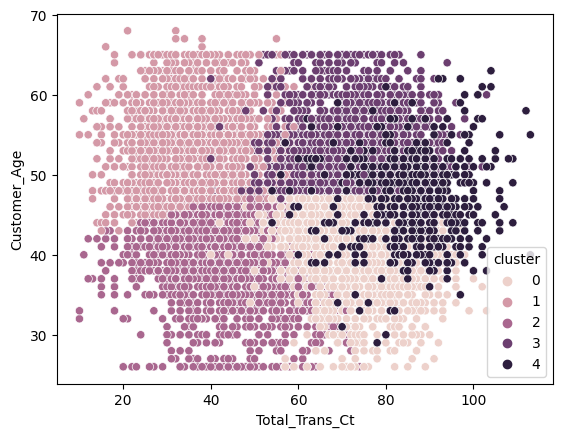

In [79]:
sns.scatterplot(data=data_noout,x='Total_Trans_Ct', y='Customer_Age', hue='cluster')

### Entre la variable edad y transaccionalidad, se recomienda al área de marketing que aumente los recursos de colocación al cluster número 4 ya que tiene un alto grado de transaccionalidad ya que su promedio es de 86 transacciones por cliente y la edad de este segmento de clientes es de 29 a 63, sin embargo, un clúster más refinado sería el clúster 0 ya que éste segmento de clientes tiene una transaccionalidad 74 no muy alejado del anterior pero tiene menos edad ya que comprende entre los 26 a 47 años 

<Axes: xlabel='Total_Trans_Amt', ylabel='Customer_Age'>

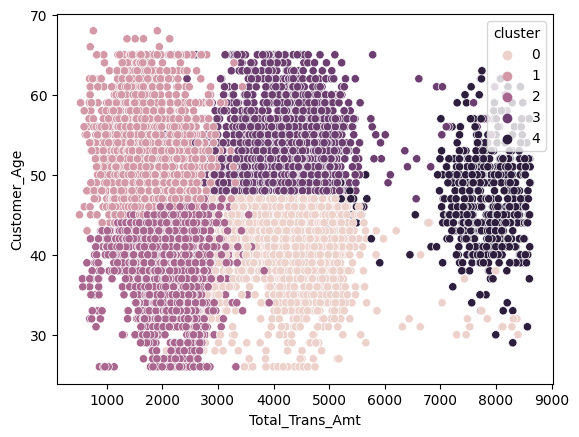

In [80]:
sns.scatterplot(data=data_noout,x='Total_Trans_Amt', y='Customer_Age', hue='cluster')

### Igual que el anterior el clúster 4 es el que se recomienda a el área de marketin que se aumente los esfuersos de colocación pero viendo a más detalle, el gráfico se centraría a los clientes entre 37 a 54 años 

In [82]:
import plotly.express as px

In [83]:
fig = px.scatter_3d(data_noout, x = 'Total_Trans_Amt',
y = 'Customer_Age',
z = 'Total_Trans_Ct',
color = 'cluster')

fig.show()

## Conclusión

### Como podemos apreciar en el gráfico de 3D, utilizando las tres variables, podemos concluir y recomendar al área de marketing que el segmento que se debe esforzar para colocar más créditos es el clúster de color amarillo (4), el cual es el que tiene mayor transaccionalidad, mayor monto y una edad media lo cual puede cumplir con su deuda a tiempo